#Pull Data From Twitter

In [1]:
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import pandas as pd

query = "asuransi  lang:id until:2023-02-26 since:2020-01-01"
tweets = []
limit = 5000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
print(df)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 KB 2.2 MB/s eta 0:00:00


<ipython-input-1-976ffef3ea18>:17: DeprecatedFeatureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content])
<ipython-input-1-976ffef3ea18>:17: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.username, tweet.content])


                          Date             User  \
0    2023-02-25 23:47:12+00:00     buruy_cubluk   
1    2023-02-25 23:46:05+00:00         Ieeknoyw   
2    2023-02-25 23:39:00+00:00  faisyal_somarta   
3    2023-02-25 23:37:30+00:00        sukasains   
4    2023-02-25 23:36:39+00:00         asmurcom   
...                        ...              ...   
4995 2023-02-13 23:58:51+00:00        amelbodor   
4996 2023-02-13 23:56:11+00:00        Oodhi_tah   
4997 2023-02-13 23:44:41+00:00       KontanNews   
4998 2023-02-13 23:41:38+00:00    GOLOG86345331   
4999 2023-02-13 23:36:16+00:00  AkuSaja29286950   

                                                  Tweet  
0     @faizrabbani_com @tokopedia @gojekindonesia Se...  
1            @cpaewon Padahal bu mau nawarin asuransi/?  
2     @KompasTV Goreng terus boong, daripada fir'nga...  
3     Studi yang dilakukan oleh sebuah perusahaan as...  
4     @ispeispewayae tinggal diconvert jadi halal de...  
...                                    

In [2]:
df_dummie = df['Tweet'].copy()

In [3]:
df_dummie[1]

'@cpaewon Padahal bu mau nawarin asuransi/?'

In [4]:
tweets_list = df_dummie.tolist()


In [5]:
tweets_list

['@faizrabbani_com @tokopedia @gojekindonesia Setau aku di tokped ada asuransi sampe 100jt, seharusnya aman',
 '@cpaewon Padahal bu mau nawarin asuransi/?',
 "@KompasTV Goreng terus boong, daripada fir'nganu biaya kampanye pakek duit rakyatnya dari asuransi,KSP, duit mafia sambal balado,  dll",
 'Studi yang dilakukan oleh sebuah perusahaan asuransi di Inggris menuturkan pakaian minim meningkatkan angka kecelakaan.',
 '@ispeispewayae tinggal diconvert jadi halal dengan bangun rumah ibadah',
 '@logikapolitikid @DitjenPajakRI Mohon Bu Mentri dan KPK jg ditahan sampai tahunan. Rugi negara. Mendingan Ambil semua Asetnya. Juga saudara yg bertransaksi dg nya, dikhawatirkan uangnya a/n saudara blio. Ambil asuransi dan saham2nya. Miskinkan bukan penjarakan. Habiskan duitnya di pengacara…',
 '@drystannnn @biasalahanakmud @CommuterLine emg yang sebelumnya bayar bg?',
 '@biasalahanakmud @CommuterLine jam kedatangan ini pun bergerak kok angkanya',
 'Bali itu tempat liburannya orang2 kelas menengah 

In [6]:
result = [string.split(' ') for string in tweets_list]
print(result)

[['@faizrabbani_com', '@tokopedia', '@gojekindonesia', 'Setau', 'aku', 'di', 'tokped', 'ada', 'asuransi', 'sampe', '100jt,', 'seharusnya', 'aman'], ['@cpaewon', 'Padahal', 'bu', 'mau', 'nawarin', 'asuransi/?'], ['@KompasTV', 'Goreng', 'terus', 'boong,', 'daripada', "fir'nganu", 'biaya', 'kampanye', 'pakek', 'duit', 'rakyatnya', 'dari', 'asuransi,KSP,', 'duit', 'mafia', 'sambal', 'balado,', '', 'dll'], ['Studi', 'yang', 'dilakukan', 'oleh', 'sebuah', 'perusahaan', 'asuransi', 'di', 'Inggris', 'menuturkan', 'pakaian', 'minim', 'meningkatkan', 'angka', 'kecelakaan.'], ['@ispeispewayae', 'tinggal', 'diconvert', 'jadi', 'halal', 'dengan', 'bangun', 'rumah', 'ibadah'], ['@logikapolitikid', '@DitjenPajakRI', 'Mohon', 'Bu', 'Mentri', 'dan', 'KPK', 'jg', 'ditahan', 'sampai', 'tahunan.', 'Rugi', 'negara.', 'Mendingan', 'Ambil', 'semua', 'Asetnya.', 'Juga', 'saudara', 'yg', 'bertransaksi', 'dg', 'nya,', 'dikhawatirkan', 'uangnya', 'a/n', 'saudara', 'blio.', 'Ambil', 'asuransi', 'dan', 'saham2nya.

In [7]:
def extractDigits(lst):
    res = []
    for el in lst:
        sub = el.split(', ')
        res.append(sub)
     
    return(res)

tweets = extractDigits(tweets_list)

In [8]:
tweets[1000]

['@ykhioooo Mungkin dia agen asuransi atau MLM kak']

In [9]:
for i in tweets:
  print(i)

['@faizrabbani_com @tokopedia @gojekindonesia Setau aku di tokped ada asuransi sampe 100jt', 'seharusnya aman']
['@cpaewon Padahal bu mau nawarin asuransi/?']
['@KompasTV Goreng terus boong', "daripada fir'nganu biaya kampanye pakek duit rakyatnya dari asuransi,KSP", 'duit mafia sambal balado', ' dll']
['Studi yang dilakukan oleh sebuah perusahaan asuransi di Inggris menuturkan pakaian minim meningkatkan angka kecelakaan.']
['@ispeispewayae tinggal diconvert jadi halal dengan bangun rumah ibadah']
['@logikapolitikid @DitjenPajakRI Mohon Bu Mentri dan KPK jg ditahan sampai tahunan. Rugi negara. Mendingan Ambil semua Asetnya. Juga saudara yg bertransaksi dg nya', 'dikhawatirkan uangnya a/n saudara blio. Ambil asuransi dan saham2nya. Miskinkan bukan penjarakan. Habiskan duitnya di pengacara…']
['@drystannnn @biasalahanakmud @CommuterLine emg yang sebelumnya bayar bg?']
['@biasalahanakmud @CommuterLine jam kedatangan ini pun bergerak kok angkanya']
['Bali itu tempat liburannya orang2 kelas

In [10]:
def listToString(s):
 
    # initialize an empty string
    str1 = ""
 
    # traverse in the string
    for ele in s:
        str1 += ele
 
    # return string
    return str1

# x = listToString(x1)
# x

In [11]:
def stringToList(s):
    # split the string by whitespace into a list
    lst = s.split()
    # return the list
    return lst

#Using Model (No need)

In [100]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# from scipy.special import softmax

# tweet = "@KompasTV Fried keeps lying, instead of fir'nganu campaign costs use people's money from insurance, KSP, mafia money with Balado sauce, etc."

# # precprcess tweet
# tweet_words = []

# for word in tweet.split(' '):
#     if word.startswith('@') and len(word) > 1:
#         word = '@user'
    
#     elif word.startswith('http'):
#         word = "http"
#     tweet_words.append(word)

# tweet_proc = " ".join(tweet_words)

# # load model and tokenizer
# roberta = "cardiffnlp/twitter-roberta-base-sentiment"

# model = AutoModelForSequenceClassification.from_pretrained(roberta)
# tokenizer = AutoTokenizer.from_pretrained(roberta)

# labels = ['Negative', 'Neutral', 'Positive']

# # sentiment analysis
# encoded_tweet = tokenizer(tweet_proc, return_tensors='pt')
# # output = model(encoded_tweet['input_ids'], encoded_tweet['attention_mask'])
# output = model(**encoded_tweet)

# scores = output[0][0].detach().numpy()
# scores = softmax(scores)

# for i in range(len(scores)):
    
#     l = labels[i]
#     s = scores[i]
#     print(l,s)

#Normalize Text Data

In [12]:
import re
!pip install emoji
import emoji
def replace_at(tweet, default_replace=""):
  tweet = re.sub(r'@\w+\s?', '', tweet)
  # tweet = re.sub('\B@\w', default_replace, tweet)
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  tweet = re.sub('#+', default_replace, tweet)
  tweet = re.sub(r'\d+', '', tweet)
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  tweet = tweet.lower()
  tweet = emoji.demojize(tweet)
  tweet = re.sub(r'@\w+\s?', '', tweet)
  return tweet
tweet_sentence = []

for i in tweets:
  i = listToString(i)
  replace_i = replace_at(i)
  tweet_sentence.append(replace_i)
tweet_sentence = extractDigits(tweet_sentence)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=adf5d4dfdc9418a1a56f52c23a0f38567f6148769f6c3889a0357a792b3ab464
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [13]:
tweet_sentence[90]

['mau tau strategi perencanaan keuanganngatur gajiinvestasiasuransibisnis &amp; gaya hidup gabung di grouptele ini ']

#Tokenization

In [14]:
# !pip install nltk 
import nltk 
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
tokenized_words = []
for i in tweet_sentence:
  test_tweet_string = i[0]
  words = word_tokenize(test_tweet_string)
  tokenized_words.append(words)


compare tokenized and untokenized

In [16]:
nums = 198
print(tweet_sentence[nums])
print(tokenized_words[nums])

['asuransi kesehatan mental']
['asuransi', 'kesehatan', 'mental']


In [17]:
tokenized_words[10]

['dengan',
 'membeli',
 'atau',
 'membantu',
 'mereka',
 'untuk',
 'memiliki',
 'asuransi',
 'jiwadan',
 'suatu',
 'nanti',
 'mereka',
 'meninggal',
 'duniamaka',
 'beban',
 'finansial',
 'yang',
 'ada',
 'dapat',
 'ditanggung',
 'bersama',
 'oleh',
 'perusahaan',
 'asuransi',
 'jiwa',
 '.',
 'hal',
 'ini',
 'tentunya',
 'dapat',
 'memberikan',
 'ketenangan',
 'bagi',
 'kamu',
 'atau',
 'pun']

using stopwords

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))
print(stop_words)

{'kemungkinan', 'berapapun', 'sekalian', 'dulu', 'meski', 'akhir', 'bagaimanapun', 'biasanya', 'kembali', 'katanya', 'menginginkan', 'sebesar', 'ujarnya', 'merupakan', 'merasa', 'bisa', 'memang', 'berlangsung', 'cuma', 'ini', 'yaitu', 'saat', 'mempersiapkan', 'sampai-sampai', 'sebenarnya', 'lalu', 'anda', 'dikatakannya', 'terbanyak', 'wahai', 'berikutnya', 'benarkah', 'betul', 'datang', 'kapanpun', 'sejauh', 'ingat-ingat', 'diantara', 'sesudah', 'lagi', 'mengibaratkan', 'sendiri', 'setempat', 'selama-lamanya', 'sesaat', 'dialah', 'untuk', 'semuanya', 'sinilah', 'lagian', 'mempertanyakan', 'tiba-tiba', 'atas', 'dipertanyakan', 'jumlahnya', 'dikerjakan', 'diperlukan', 'telah', 'betulkah', 'berlainan', 'berbagai', 'berkata', 'perlukah', 'sebut', 'macam', 'mau', 'mampukah', 'setiap', 'tentulah', 'andalah', 'ungkapnya', 'cukup', 'sebegini', 'seperti', 'mulanya', 'sayalah', 'sebutlah', 'perlunya', 'sekurangnya', 'menunjukkan', 'segalanya', 'terdapat', 'menanya', 'seolah-olah', 'sedikit', 'su

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
dummy_tokenized = tokenized_words[2]

In [20]:
dummy_tokenized

['goreng',
 'terus',
 'boongdaripada',
 "fir'nganu",
 'biaya',
 'kampanye',
 'pakek',
 'duit',
 'rakyatnya',
 'dari',
 'asuransi',
 ',',
 'kspduit',
 'mafia',
 'sambal',
 'balado',
 'dll']

In [21]:
tokens_without_stopword = [word for word in dummy_tokenized if not word in stop_words]

In [22]:
print(dummy_tokenized)
print(tokens_without_stopword)

['goreng', 'terus', 'boongdaripada', "fir'nganu", 'biaya', 'kampanye', 'pakek', 'duit', 'rakyatnya', 'dari', 'asuransi', ',', 'kspduit', 'mafia', 'sambal', 'balado', 'dll']
['goreng', 'boongdaripada', "fir'nganu", 'biaya', 'kampanye', 'pakek', 'duit', 'rakyatnya', 'asuransi', ',', 'kspduit', 'mafia', 'sambal', 'balado', 'dll']


In [23]:
tokens_without_stopword

['goreng',
 'boongdaripada',
 "fir'nganu",
 'biaya',
 'kampanye',
 'pakek',
 'duit',
 'rakyatnya',
 'asuransi',
 ',',
 'kspduit',
 'mafia',
 'sambal',
 'balado',
 'dll']

In [24]:
tweet_sentence[:2]

[['setau aku di tokped ada asuransi sampe jtseharusnya aman'],
 ['padahal bu mau nawarin asuransi/?']]

In [25]:
tokens_without_stopword_tweet = []

for sentence in tweet_sentence:
    tokens_without_stopword_sentence = []
    # iterate over each word in the sentence
    for word in sentence[0].split():
        # check if the word is not in stop_words
        if not word.lower() in stop_words:
            tokens_without_stopword_sentence.append(word.lower())
    tokens_without_stopword_tweet.append(tokens_without_stopword_sentence)

print(tokens_without_stopword_tweet[200])

['perencanaan', 'keuangan', 'butuh', 'keputusan', 'cerdas', 'karena…', '“eman”', 'kudu', 'uang', 'bayar', 'asuransi', 'kesehatanmaka', 'rela', 'hasil', 'kerja', 'kerasmu', 'lenyap', 'sekejap', 'bayar', 'tagihan', 'rumah', 'sakit.', 'asuransi', 'asuransikesehatan']


In [26]:
print(tokens_without_stopword_tweet[51])
print(tokenized_words[51])

['gerah', 'ya', 'membandingkan', 'label', 'agency', 'gak', 'apple', 'to', 'apple.', 'h', 'agency?', 'gini', 'deh', 'logikanya', 'kayak', 'perusahaan', 'asuransikantor', 'pusat', '(h)', 'cabang', '(agency)setiap', 'cabang', 'kepala', 'cabang', 'yg', 'mengatur', 'cabangnya']
['lama', 'gerah', 'ya', 'membandingkan', 'label', 'sama', 'agency', 'yang', 'gak', 'apple', 'to', 'apple', '.', 'dan', 'sejak', 'kapan', 'h', 'itu', 'agency', '?', 'sekarang', 'gini', 'deh', 'logikanya', 'kayak', 'perusahaan', 'asuransikantor', 'pusat', '(', 'h', ')', 'punya', 'berbagai', 'cabang', '(', 'agency', ')', 'setiap', 'cabang', 'punya', 'kepala', 'cabang', 'yg', 'mengatur', 'masing', 'cabangnya']


In [27]:
df['Stem'] = tokens_without_stopword_tweet

Most Common Word

In [28]:
from collections import Counter
top = Counter([item for sublist in df['Stem'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,asuransi,4548
1,yg,912
2,ga,592
3,kesehatan,555
4,gak,550
5,.,541
6,kalo,480
7,ya,477
8,aja,410
9,udah,374


Word Cloud

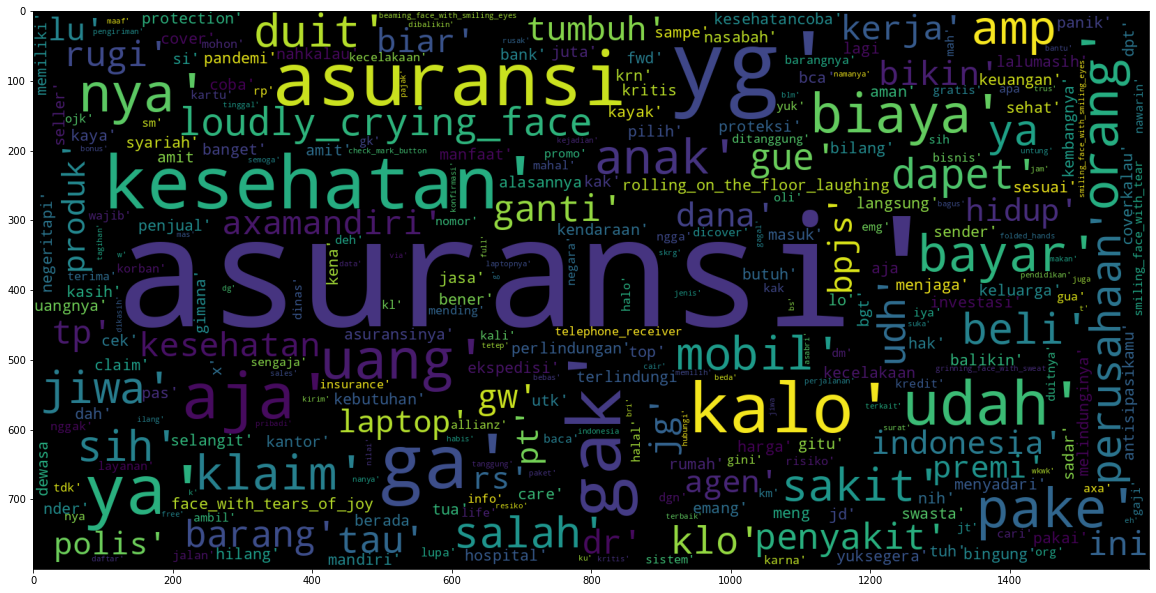

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 300 , width = 1600 , height = 800,
               collocations=False).generate(",".join([str(i) for i in df['Stem']]))
plt.imshow(wc)

In [30]:
from collections import Counter

word_counts = Counter()
for sublist in tokens_without_stopword_tweet:
    word_counts.update(sublist)

most_common_words = word_counts.most_common()
print(most_common_words)


[('asuransi', 4548), ('yg', 912), ('ga', 592), ('kesehatan', 555), ('gak', 550), ('.', 541), ('kalo', 480), ('ya', 477), ('aja', 410), ('udah', 374), ('asuransi.', 339), ('uang', 313), ('pake', 302), ('biaya', 282), ('nya', 278), ('orang', 258), ('bayar', 254), ('anak', 232), ('klaim', 227), ('-', 222), ('mobil', 211), ('sakit', 200), ('duit', 199), ('jiwa', 196), ('&amp;', 189), ('salah', 187), ('beli', 183), ('sih', 182), ('perusahaan', 177), ('dapet', 170), ('udh', 157), ('klo', 155), ('tau', 154), ('gue', 151), ('barang', 150), ('ganti', 149), ('penyakit', 146), ('rugi', 142), ('kerja', 139), ('jg', 134), ('bikin', 133), ('gw', 133), ('axamandiri', 131), ('tumbuh', 131), ('dr', 129), ('tp', 128), ('dana', 126), ('biar', 121), ('indonesia', 121), ('bpjs', 119), (':', 118), ('pt', 115), ('rs', 114), ('agen', 113), ('lu', 111), ('hidup', 111), ('laptop', 111), ('polis', 110), ('produk', 108), ('premi', 107), ('si', 106), ('balikin', 106), ('tua', 105), ('sampe', 104), ('pas', 104), ('

In [31]:
df["Stem"]

0       [setau, tokped, asuransi, sampe, jtseharusnya,...
1                               [bu, nawarin, asuransi/?]
2       [goreng, boongdaripada, fir'nganu, biaya, kamp...
3       [studi, perusahaan, asuransi, inggris, pakaian...
4       [tinggal, diconvert, halal, bangun, rumah, iba...
                              ...                        
4995    [semalem, gue, mimpi, ngolah, data, asuransi, ...
4996    [pengelola, jasa, asuransi, hidupnya, dijamin,...
4997    [kresna, life, dicabut, izinnyapemegang, polis...
4998    [namanya, kali, buka, mandiri, kirain, emng, k...
4999    [liat, vidio, nya, kirain, sales, asuransi., :...
Name: Stem, Length: 5000, dtype: object

In [32]:
lexicon_positive = dict()
import csv
with open('/content/positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # skip the first row (column headers)
    for row in reader:
        try:
            row[1] = int(row[1])
            lexicon_positive[row[0]] = int(row[1])
            # print(row)
        except ValueError:
            print(f"Error: invalid integer value in row {row}")


        
lexicon_negative = dict()
import csv
with open('/content/negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # skip the first row (column headers)
    for row in reader:
        try:
            row[1] = int(row[1])
            lexicon_negative[row[0]] = int(row[1])
            # print(row)
        except ValueError:
            print(f"Error: invalid integer value in row {row}")

        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [33]:
results = df["Stem"].apply(sentiment_analysis_lexicon_indonesia)



results


0         (0, neutral)
1         (0, neutral)
2       (-3, negative)
3        (4, positive)
4        (5, positive)
             ...      
4995    (-1, negative)
4996     (4, positive)
4997    (-6, negative)
4998    (-7, negative)
4999     (1, positive)
Name: Stem, Length: 5000, dtype: object

In [34]:
sentiments = results.apply(lambda x: x[1])
df["Sentiments"] = sentiments

In [35]:
Weights = results.apply(lambda x: x[0])
df["Weights"] = Weights

#End Result

In [36]:
df.loc[:, ["Tweet","Weights", "Sentiments"]]


,Tweet,Weights,Sentiments
0,@faizrabbani_com @tokopedia @gojekindonesia Se...,0,neutral
1,@cpaewon Padahal bu mau nawarin asuransi/?,0,neutral
2,"@KompasTV Goreng terus boong, daripada fir'nga...",-3,negative
3,Studi yang dilakukan oleh sebuah perusahaan as...,4,positive
4,@ispeispewayae tinggal diconvert jadi halal de...,5,positive
...,...,...,...
4995,Semalem gue mimpi ngolah data asuransi dong ge...,-1,negative
4996,@Uki23 @psi_id Pengelola jasa Asuransi hidupny...,4,positive
4997,"Tak Ingin Kresna Life Dicabut Izinnya, Pemegan...",-6,negative
4998,@gempar_bayu @tanyakanrl Namanya baru pertama ...,-7,negative


In [37]:
counts = df["Sentiments"].value_counts()
counts

negative    2309
positive    1882
neutral      809
Name: Sentiments, dtype: int64